# прямое и обратное дискретное преобразование фурье

In [1]:
from numpy import array, arange, abs as np_abs
from numpy.fft import rfft, rfftfreq
from math import sin, pi, cos, sqrt
import matplotlib.pyplot as plt
import matplotlib as mpl

N = 1000
w = (2 * pi / N)
A = 2
B = 4
#sin_sig = array([A * sin(4 * w * t) + B * cos(9 * w * t)  for t in range(N)])
sin_sig = array([A * sin(6 * w * t) + B * cos(12 * w * t) + 3* A * sin(2 * w * t) + 5 * B * cos(1 * w * t) for t in range(N)])
plt.plot(arange(N), sin_sig, 'r')
plt.grid(True)
plt.show()

<Figure size 640x480 with 1 Axes>

In [2]:
import math
import cmath

def DFT(fnList):
    N = len(fnList)
    FmList = []
    for m in range(N):
        Fm = 0.0
        for n in range(N):
            Fm += fnList[n] * cmath.exp(1j * 2.0 * math.pi  * m * n / N)
        #FmList.append(Fm)
        FmList.append(Fm / N)
    return FmList

def InverseDFT(FmList):
    N = len(FmList)
    fnList = []
    for n in range(N):
        fn = 0.0
        for m in range(N):
            fn += FmList[m] * cmath.exp(-1j * 2.0 * math.pi  * m * n / N)
        #fnList.append(fn / N)
        fnList.append(fn)
    return fnList
        

In [3]:
I = DFT(sin_sig)

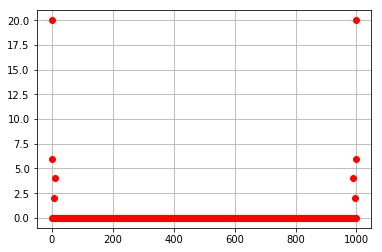

In [4]:
M = []
for i in range(len(I)):
    M.append(sqrt(I[i].real**2 + I[i].imag**2) * 2)

plt.plot(arange(N), M, 'ro')
plt.grid(True)
plt.show()

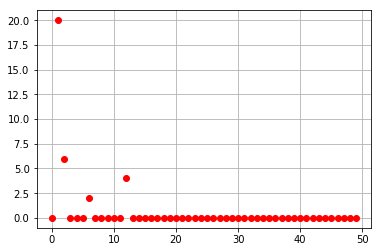

In [5]:
plt.plot(arange(N / 20), M[0:int(N / 20)], 'ro')
plt.grid(True)
plt.show()

In [6]:
for i in range(int(N / 20)):
    if (I[i] > 1 / N or I[i] < -1 / N):
        print(I[i])
        print(i)

(10+1.08957287637e-15j)
1
(2-2.42272868434e-15j)
12


In [7]:
H = InverseDFT(I)

/home/zaber/.local/lib/python3.5/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


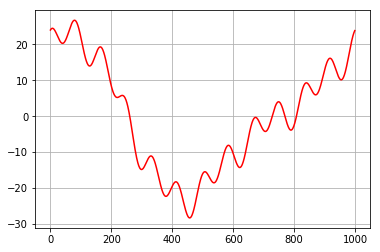

In [8]:
plt.plot(arange(N), H, 'r')
plt.grid(True)
plt.show()

In [9]:
def FDFT(fnList):
    N = len(fnList)
    FmList = []
    for m in range(N):
        Fm = 0.0
        for n in range(N):
            Fm += fnList[n] * cmath.exp(- 1j * 2.0 * math.pi  * m * n / N)
        #FmList.append(Fm)
        #if(Fm / N > 0.00848 or Fm / N < -0.00848):
        if(Fm / N > 0.01 or Fm / N < -0.01):
            FmList.append(Fm / N)
    return FmList

In [10]:
FI = FDFT(sin_sig)

/home/zaber/.local/lib/python3.5/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


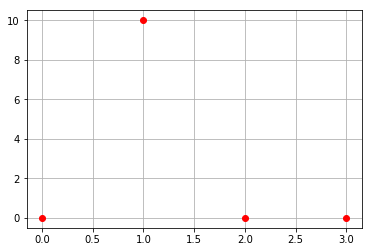

In [11]:
plt.plot(arange(len(FI)), I[0:len(FI)], 'ro')
plt.grid(True)
plt.show()

In [12]:
for i in range(len(FI)):
    print(FI[i])
    print(i)

(10-1.08957287637e-15j)
0
(2+2.42272868434e-15j)
1
(2+3.86210396996e-13j)
2
(10+1.63409011322e-12j)
3


In [13]:
FH = InverseDFT(FI)
#FH[0] = B #амплитуда косинуса в нуле

In [14]:
TH = []
for i in range(len(H)):
    if(i % int(len(H) / len(FH)) == 0):
        TH.append(H[i])

/home/zaber/.local/lib/python3.5/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


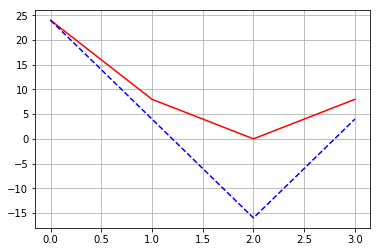

In [15]:
plt.plot(arange(len(FH)), FH, 'r')
plt.plot(arange(len(FH)), TH[0:len(FH)], 'b--')
plt.grid(True)
plt.show()

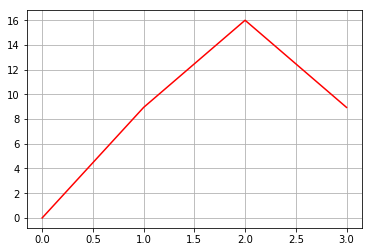

In [16]:
diff = []
for i in range(len(FH)):
    diff.append(abs(FH[i] - TH[i]))
    
plt.plot(arange(len(diff)), diff, 'r')
plt.grid(True)
plt.show()